In [ ]:
# mount drive
from google.colab import drive
drive.mount("/drive") 

Mounted at /drive


In [ ]:
# imports
import numpy as np
import pandas as pd

In [ ]:
# imports for plots
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

pio.templates.default = "plotly_white"

In [ ]:
# load data
# weather variables to use
selected_cols = ["cumulative_GDD", "cumulative_PREC", "cumulative_RH2M", "cumulative_WS2M"]

dict_data = {}

for col in selected_cols:
  pathname = f"/drive/My Drive/Colab Notebooks/AgriEdge/data_univariate_clustering/{col}.csv"

  dict_data[col] = pd.read_csv(pathname, index_col=0)

In [ ]:
# standarize
dict_standarized_data = {}

for col in selected_cols:
  # select data
  data = dict_data[col].copy()

  # scale data
  max_val = np.max(data.values)
  min_val = np.min(data.values)
  data = (data - min_val) / (max_val - min_val)

  # standarize each var
  for var in dict_data[col]:
    data[var] = (data[var] - data[var].mean())

  dict_standarized_data[col] = data

In [ ]:
dict_standarized_data["cumulative_GDD"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268
1982,0.001236,0.001883,0.002356,0.003464,0.004948,0.006110,0.006680,0.006812,0.007366,0.007407,0.007204,0.006541,0.006182,0.005891,0.006213,0.006420,0.006655,0.007068,0.007688,0.008259,0.008925,0.009714,0.010407,0.010674,0.010964,0.011744,0.012442,0.013785,0.015161,0.016400,0.017804,0.019312,0.020178,0.021138,0.022255,0.023093,0.024092,0.025104,0.026276,0.027653,...,0.032194,0.031868,0.031388,0.030968,0.030478,0.030079,0.030021,0.030093,0.030393,0.030363,0.030140,0.029826,0.029629,0.030026,0.030856,0.031185,0.030669,0.030361,0.029968,0.029521,0.029279,0.028721,0.028089,0.027610,0.027112,0.026262,0.025825,0.026015,0.026720,0.028084,0.029620,0.029415,0.028067,0.026912,0.026031,0.025633,0.025509,0.025052,0.024873,0.025203
1983,-0.000221,-0.000584,-0.001011,-0.001775,-0.002860,-0.003957,-0.005151,-0.006008,-0.006958,-0.008138,-0.009021,-0.009453,-0.010019,-0.010231,-0.010398,-0.010625,-0.010806,-0.010853,-0.010692,-0.010610,-0.010461,-0.010493,-0.010823,-0.010485,-0.011184,-0.011920,-0.012544,-0.012898,-0.013068,-0.013124,-0.013818,-0.014646,-0.015111,-0.015366,-0.015454,-0.015395,-0.015426,-0.015469,-0.015064,-0.014728,...,-0.033966,-0.034138,-0.033596,-0.033265,-0.033142,-0.033106,-0.033322,-0.032821,-0.032127,-0.031186,-0.029982,-0.028672,-0.027529,-0.026642,-0.025497,-0.024164,-0.023248,-0.022621,-0.022684,-0.023058,-0.023202,-0.023702,-0.024433,-0.025123,-0.025686,-0.026326,-0.027046,-0.027533,-0.027922,-0.028421,-0.028586,-0.028997,-0.029663,-0.030352,-0.030979,-0.031642,-0.032518,-0.033328,-0.034135,-0.034596
1984,0.000437,0.000632,0.000638,0.001049,0.001807,0.002751,0.003728,0.004395,0.004634,0.004442,0.004537,0.004880,0.004878,0.005040,0.005184,0.005431,0.006030,0.006797,0.007230,0.007202,0.007344,0.007559,0.007156,0.007194,0.007495,0.007925,0.007871,0.007999,0.008363,0.008845,0.009218,0.009631,0.010141,0.010262,0.010572,0.011449,0.012044,0.012277,0.012436,0.012899,...,-0.020574,-0.021760,-0.022904,-0.023781,-0.024890,-0.026036,-0.026813,-0.027471,-0.027664,-0.027500,-0.027290,-0.027187,-0.026746,-0.026335,-0.025739,-0.025140,-0.025092,-0.025830,-0.026509,-0.026812,-0.027294,-0.027722,-0.027861,-0.028011,-0.028157,-0.028429,-0.028689,-0.029219,-0.029648,-0.030314,-0.030960,-0.031068,-0.030611,-0.030098,-0.029357,-0.028411,-0.027674,-0.026831,-0.026457,-0.025976
1985,0.000343,0.000486,0.000507,0.000414,-0.000039,-0.000584,-0.001138,-0.001064,-0.000546,0.000233,0.000275,0.000316,0.000317,0.000811,0.001302,0.001401,0.001727,0.002092,0.001923,0.002034,0.002118,0.001427,0.001143,0.000885,0.000207,-0.000672,-0.001415,-0.001859,-0.002347,-0.003073,-0.003621,-0.003744,-0.003736,-0.003440,-0.003186,-0.003149,-0.003184,-0.003127,-0.002830,-0.002276,...,-0.011444,-0.012101,-0.012640,-0.012895,-0.013007,-0.013382,-0.013538,-0.013671,-0.013451,-0.013029,-0.012398,-0.012101,-0.012458,-0.012870,-0.012912,-0.012862,-0.012654,-0.012940,-0.013290,-0.013150,-0.013250,-0.013583,-0.013900,-0.014117,-0.013771,-0.013204,-0.012801,-0.012569,-0.012373,-0.012271,-0.012287,-0.012972,-0.013679,-0.013525,-0.013004,-0.012474,-0.011179,-0.010723,-0.010685,-0.010720
1986,0.001100,0.001815,0.002458,0.002960,0.003211,0.003571,0.004173,0.004901,0.005342,0.005823,0.006610,0.006991,0.006750,0.006364,0.006015,0.005838,0.006012,0.006199,0.006349,0.006332,0.006340,0.006625,0.007170,0.007990,0.009334,0.010913,0.012189,0.013044,0.012986,0.012957,0.012774,0.012502,0.012128,0.011589,0.011206,0.010910,0.010625,0.009959,0.009225,0.008731,...,-0.018478,-0.018825,-0.019415,-0.019791,-0.019845,-0.020339,-0.020691,-0.020634,-0.020370,-0.020516,-0.020508,-0.020080,-0.019619,-0.019069,-0.018966,-0.019018,-0.019148,-0.019524,-0.019699,-0.020439,-0.021553,-0.022583,-0.023321,-0.023747,-0.024238,-0.024686,

In [ ]:
# from PCA time dimension univariate
# cumulative GDD: n_components = 6
# cumulative PREC: n_components = 7

from sklearn.decomposition import PCA


arr_nb_PC = [6, 7, 8, 8]

# where to store pca
dict_pca = {}
# where to store transformed data
dict_transformed_data = {}

# loop over weather vars
for col, n in zip(selected_cols, arr_nb_PC):
  # build pca
  pca = PCA(n_components=n)
  pca.fit(dict_standarized_data[col])

  dict_pca[col] = pca

  # transform data
  dict_transformed_data[col] = pd.DataFrame(pca.transform(dict_standarized_data[col]), index=dict_standarized_data[col].index)

In [ ]:
dict_transformed_data["cumulative_PREC"]

,0,1,2,3,4,5,6
1982,0.812141,1.136826,0.129547,0.345353,-0.323735,0.168523,-0.012214
1983,-0.910387,-0.147130,-0.133312,-0.190738,0.109870,0.077318,-0.116758
1984,-0.928302,0.074417,0.357072,0.344728,-0.070567,0.098591,-0.133753
1985,-2.238344,-0.122822,-0.065576,0.024352,-0.122032,0.077975,-0.044037
1986,-0.784248,0.591180,-0.243686,-0.227761,0.028401,0.080321,0.022401
1987,-0.452177,0.272239,-0.649210,-0.451154,-0.053178,0.335993,0.101851
1988,-0.389397,-0.256088,-0.206053,0.043563,0.049590,0.055931,-0.026695
1989,-1.084296,0.383333,0.447291,-0.040193,0.069586,-0.017241,0.122396
1990,0.249123,-0.233962,0.195605,0.361649,-0.056396,-0.047524,0.032640
1991,0.650892,0.261396,0.087650,-0.162111,0.384414,-0.068947,-0.009645


In [ ]:
# join two data sets
merged_data = dict_transformed_data["cumulative_GDD"].join(dict_transformed_data["cumulative_PREC"], rsuffix='_other')

merged_data

,0,1,2,3,4,5,0_other,1_other,2_other,3_other,4_other,5_other,6
1982,-0.540850,0.173390,0.028654,0.001792,0.013997,0.001309,0.812141,1.136826,0.129547,0.345353,-0.323735,0.168523,-0.012214
1983,0.381457,-0.085105,-0.099465,-0.015467,0.032633,-0.021586,-0.910387,-0.147130,-0.133312,-0.190738,0.109870,0.077318,-0.116758
1984,-0.000347,0.242637,-0.015333,-0.039806,-0.014838,-0.048626,-0.928302,0.074417,0.357072,0.344728,-0.070567,0.098591,-0.133753
1985,0.053186,0.058591,-0.033073,-0.013999,-0.001337,-0.023563,-2.238344,-0.122822,-0.065576,0.024352,-0.122032,0.077975,-0.044037
1986,0.167989,0.164612,0.067081,0.022486,0.031901,0.060061,-0.784248,0.591180,-0.243686,-0.227761,0.028401,0.080321,0.022401
1987,-0.067384,-0.115074,-0.010171,-0.030884,-0.005195,-0.001371,-0.452177,0.272239,-0.649210,-0.451154,-0.053178,0.335993,0.101851
1988,0.167591,0.072444,-0.063996,-0.021009,-0.039865,-0.000065,-0.389397,-0.256088,-0.206053,0.043563,0.049590,0.055931,-0.026695
1989,0.030202,0.081692,-0.026074,-0.015475,0.047096,0.019511,-1.084296,0.383333,0.447291,-0.040193,0.069586,-0.017241,0.122396
1990,-0.388380,-0.001882,-0.037959,-0.019341,0.021840,0.011753,0.249123,-0.233962,0.195605,0.361649,-0.056396,-0.047524,0.032640
1991,0.555144,0.155271,0.027162,0.036704,0.011371,-0.003690,0.650892,0.261396,0.087650,-0.162111,0.384414,-0.068947,-0.009645


In [ ]:
# params
metric = "euclidean"
linkage_method = "ward"

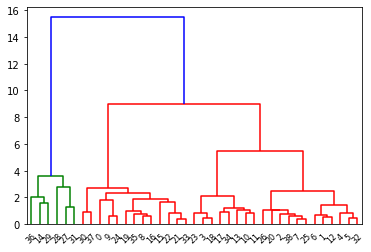

In [ ]:
# clustering
# dendrogram to have an idea about aggregation procedure
# and the evolution between cluster distance

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(merged_data, metric=metric, method=linkage_method)
# fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
# use Calanski-Harabasz index
# to choose the right number of cluster

from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


# where to store CH index
arr_calanski = {}

# max possible number of cluster
max_k = 10

# data
X = merged_data

# loop over number of clusters
for k in range(2, max_k):
  # build model 
  model = AgglomerativeClustering(n_clusters=k, linkage=linkage_method, affinity=metric)
  model = model.fit(X)

  # clusters label
  labels = model.fit_predict(X)

  # compute calanski metric
  m = metrics.calinski_harabasz_score(X, labels)

  arr_calanski[k] = m


# plot of CH index
fig = go.Figure(data=[
                      go.Scatter(x=list(arr_calanski.keys()), y=list(arr_calanski.values()))
])

fig.update_layout(
    width=800,
    height=500,
    xaxis_title="number of cluster",
    yaxis_title="Calanski-Harbasz index"
)

fig.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

X = merged_data
model = AgglomerativeClustering(n_clusters=3, linkage=linkage_method, affinity=metric)
model = model.fit(X)

labels = model.fit_predict(X)

labels

array([2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 0])